In [2]:
Библиотеки 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import preprocessing

In [3]:
df = pd.read_csv("dataframe.csv")
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ANT Development,developer,https://www.cian.ru/sale/flat/303519398/,Москва,sale,flat,11,13,5,265.6,...,Чистовая,-1,-1,74951346248,3 м,Дорогомилово,NaN,3к1,Парк Победы,Виктори Парк Резиденсез ЖК
1,ID 18174647,realtor,https://www.cian.ru/sale/flat/301450189/,Москва,sale,flat,26,31,5,246.7,...,-1,"140,9 м²",28 м²,79166462390,"3,1 м",Очаково-Матвеевское,Нежинская,1к1,Давыдково,Кутузовская Ривьера
2,Monumental Group,real_estate_agent,https://www.cian.ru/sale/flat/306835123/,Москва,sale,flat,4,8,5,117.0,...,-1,-1,10 м²,79672086536,"3,2 м",Пресненский,Большая Садовая,3С1,Маяковская,NaN
3,Главстрой,developer,https://www.cian.ru/sale/flat/296921235/,Москва,sale,flat,24,24,5,172.5,...,Без отделки,"104,6 м²","10,5 м²",74951379308,"3,2 м",Филевский парк,Береговой проезд,2,Фили,Береговой-2
4,Рента,real_estate_agent,https://www.cian.ru/sale/flat/307983948/,Москва,sale,flat,3,9,5,234.8,...,-1,140 м²,23 м²,79663231016,-1,Тверской,Краснопролетарская,7,Новослободская,Ласточкино гнездо


In [4]:
df.drop(columns=['author', 'author_type', 'deal_type', 'url', 'accommodation_type', 'phone', 'house_number'], inplace=True)
df = df.drop_duplicates()

<Figure size 1000x600 with 0 Axes>

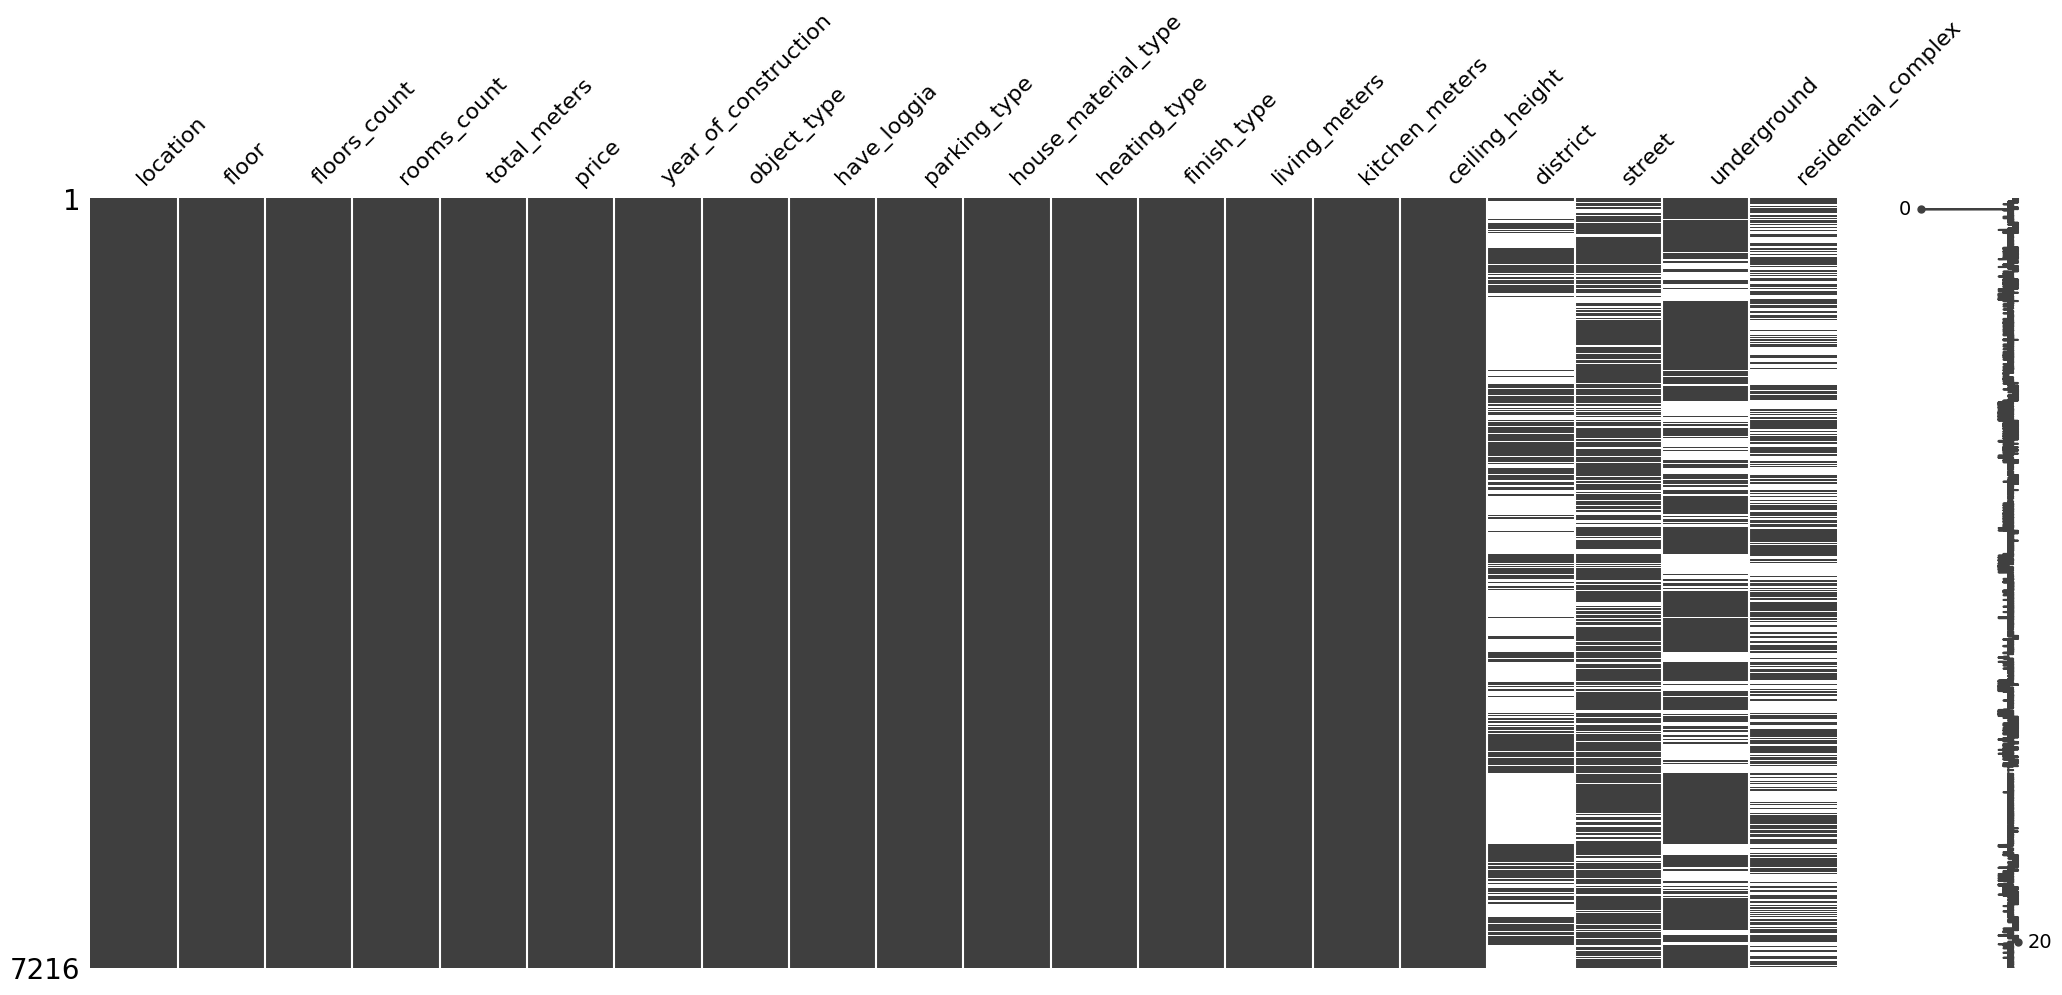

In [5]:
plt.figure(figsize=(10, 6))
msno.matrix(df)
plt.show()


In [6]:
df_cleaned = df.dropna(thresh=3)  


In [7]:
df_cleaned.replace(-1, np.nan, inplace=True)
df_cleaned['total_meters'] = pd.to_numeric(df_cleaned['total_meters'], errors='coerce')

print(df_cleaned.isnull().sum())

location                   0
floor                      0
floors_count               0
rooms_count                0
total_meters               1
price                     13
year_of_construction       0
object_type                0
have_loggia                0
parking_type               0
house_material_type        0
heating_type               0
finish_type                0
living_meters              0
kitchen_meters             0
ceiling_height             0
district                4346
street                  1498
underground             2203
residential_complex     3574
dtype: int64


C:\Users\josha\AppData\Local\Temp\ipykernel_4536\3689387971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.replace(-1, np.nan, inplace=True)
C:\Users\josha\AppData\Local\Temp\ipykernel_4536\3689387971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['total_meters'] = pd.to_numeric(df_cleaned['total_meters'], errors='coerce')


In [8]:
for column in df_cleaned.columns:
    if df_cleaned[column].dtype in ['float64', 'int64']:
        df_cleaned[column].fillna(df_cleaned[column].mean(), inplace=True) 
    elif df_cleaned[column].dtype == 'object':
        df_cleaned[column].fillna(df_cleaned[column].mode()[0], inplace=True)


C:\Users\josha\AppData\Local\Temp\ipykernel_4536\1329802544.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[column].fillna(df_cleaned[column].mode()[0], inplace=True)
C:\Users\josha\AppData\Local\Temp\ipykernel_4536\1329802544.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column].fillna(df_cleaned[column].mode()

In [9]:
print("\nПроверка на пустые значения после заполнения:")
print(df_cleaned.isnull().sum())


Проверка на пустые значения после заполнения:
location                0
floor                   0
floors_count            0
rooms_count             0
total_meters            0
price                   0
year_of_construction    0
object_type             0
have_loggia             0
parking_type            0
house_material_type     0
heating_type            0
finish_type             0
living_meters           0
kitchen_meters          0
ceiling_height          0
district                0
street                  0
underground             0
residential_complex     0
dtype: int64


In [10]:
thresholds = {
    'total_meters': (5, 240)
    'prise': (5, 240)
}

for column, (lower, upper) in thresholds.items():
    if column in df_cleaned.columns:
        df_cleaned = df_cleaned[df_cleaned[column].notna() & (df_cleaned[column] >= lower) & (df_cleaned[column] <= upper)]
    else:
        print(f"Столбец '{column}' не найден.")

print("\nРазмеры DataFrame после удаления выбросов:")
print(df_cleaned.shape)


Размеры DataFrame после удаления выбросов:
(7187, 20)


In [11]:
df_cleaned['price'] = pd.to_numeric(df_cleaned['price'], errors='coerce')
if df_cleaned['total_meters'].isnull().any() or df_cleaned['price'].isnull().any():
    print("Внимание: В столбцах 'price' или 'total_meters' есть недопустимые значения. Проверьте данные.")


Внимание: В столбцах 'price' или 'total_meters' есть недопустимые значения. Проверьте данные.


In [12]:
def number_encode_features(init_df):
    result = init_df.copy()
    encoders = {}
    for column in result.columns:
        if result[column].dtype == 'object':
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders 


In [14]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [15]:
df_cleaned = remove_outliers(df_cleaned, ['total_meters', 'price'])
encoded_data, encoders = number_encode_features(df_cleaned)


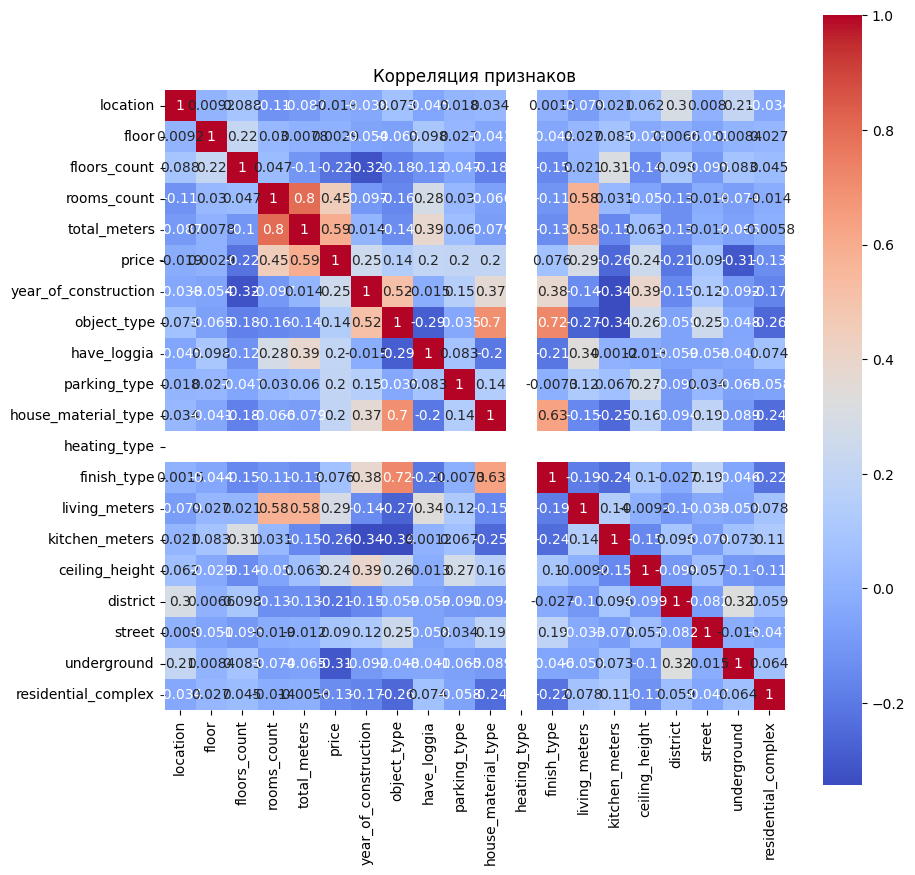

In [16]:
plt.subplots(figsize=(10, 10))
sns.heatmap(encoded_data.corr(), square=True, annot=True, cmap='coolwarm')
plt.title("Корреляция признаков")
plt.show()

In [17]:
df_cleaned['price_per_sqm'] = df_cleaned['price'] / df_cleaned['total_meters']
df_cleaned = df_cleaned[df_cleaned['total_meters'] > 0]
average_price_per_sqm = df_cleaned['price_per_sqm'].mean()
print(f"\nСредняя цена за квадратный метр: {average_price_per_sqm:.2f} Рублей")
heating_type



Средняя цена за квадратный метр: 170666.96 Рублей


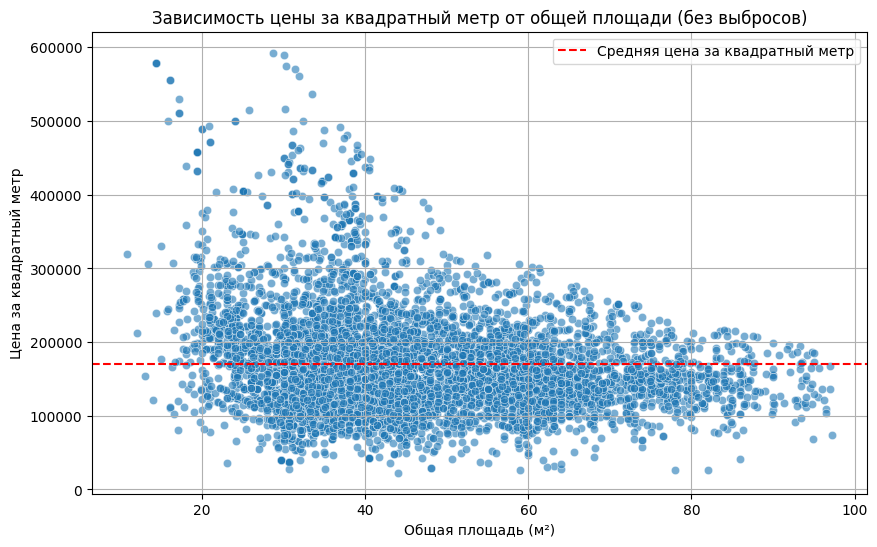

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='total_meters', y='price_per_sqm', alpha=0.6)
plt.title('Зависимость цены за квадратный метр от общей площади (без выбросов)')
plt.xlabel('Общая площадь (м²)')
plt.ylabel('Цена за квадратный метр')
plt.axhline(y=average_price_per_sqm, color='r', linestyle='--', label='Средняя цена за квадратный метр')
plt.legend()
plt.grid()
plt.show()